In [8]:
import os
import sys
import re
import uuid
import random
import imageio
import json
import numpy as np
import torch
import torch_scatter

from scipy import misc
from PIL import Image
from tqdm import tqdm
from enum import Enum

import matplotlib.pyplot as plt


In [9]:
def get_cam_type(cam_type):
    
    CamType = Enum("CamType", ("CAM_B0", "CAM_F0", "CAM_L0", "CAM_L1", "CAM_L2", "CAM_R0", "CAM_R1", "CAM_R2"))

    assert cam_type in CamType.__members__, f"cam_type must be one of {CamType.__members__.keys()}"
    assert cam_type == CamType[cam_type].name
    cam_type = CamType[cam_type]

    return cam_type

In [31]:
data_dir = "../data/navsim_org"
img_dir = os.path.join(data_dir, "sensor_blobs", "trainval")
available_scenes = []
for file in os.listdir(img_dir):
    if len(os.listdir(os.path.join(img_dir, file, "CAM_F0"))) >= 150:
        available_scenes.append(file)
        # print(file)
available_scenes = sorted(available_scenes)
print("Number of Available scenes: ", len(available_scenes))
for scene in available_scenes:
    print(f"{scene}: {len(os.listdir(os.path.join(img_dir, scene, 'CAM_F0')))}")

Number of Available scenes:  222
2021.05.12.19.36.12_veh-35_00568_01168: 212
2021.05.12.22.00.38_veh-35_00215_00995: 285
2021.05.12.22.28.35_veh-35_00620_01164: 207
2021.05.12.22.28.35_veh-35_01175_02127: 384
2021.05.12.23.36.44_veh-35_02035_02387: 155
2021.06.07.13.53.57_veh-35_02489_03145: 254
2021.06.07.17.46.49_veh-35_02607_03120: 314
2021.06.07.17.46.49_veh-35_04084_04828: 282
2021.06.07.17.46.49_veh-35_04839_05184: 188
2021.06.08.12.54.54_veh-26_00015_00507: 155
2021.06.08.12.54.54_veh-26_02994_03970: 223
2021.06.08.14.14.51_veh-35_00893_01188: 188
2021.06.08.16.31.33_veh-38_00015_00262: 168
2021.06.08.17.36.50_veh-26_03873_04225: 167
2021.06.09.11.54.15_veh-12_04366_04810: 248
2021.06.09.12.06.35_veh-35_00422_01112: 255
2021.06.09.12.39.51_veh-26_00609_01168: 215
2021.06.09.12.39.51_veh-26_03951_04180: 164
2021.06.09.12.39.51_veh-26_04543_05321: 258
2021.06.09.12.51.31_veh-35_01729_02626: 176
2021.06.09.14.58.55_veh-35_00193_01084: 303
2021.06.09.14.58.55_veh-35_04695_05321: 213

In [28]:
cam_type = get_cam_type("CAM_F0")
scene = random.choice(available_scenes)
info = np.load(os.path.join(data_dir, "navsim_logs", "trainval", f"{scene}.pkl"), allow_pickle=True)
info_available = [info[i] for i in range(len(info)) if os.path.exists(os.path.join(img_dir, info[i]['cams'][cam_type.name]['data_path']))]
print("Scene: ", scene, "\nCamType: ", cam_type.name, "\nNumber of images: ", len(info_available))

Scene:  2021.06.07.17.46.49_veh-35_04084_04828 
CamType:  CAM_F0 
Number of images:  282


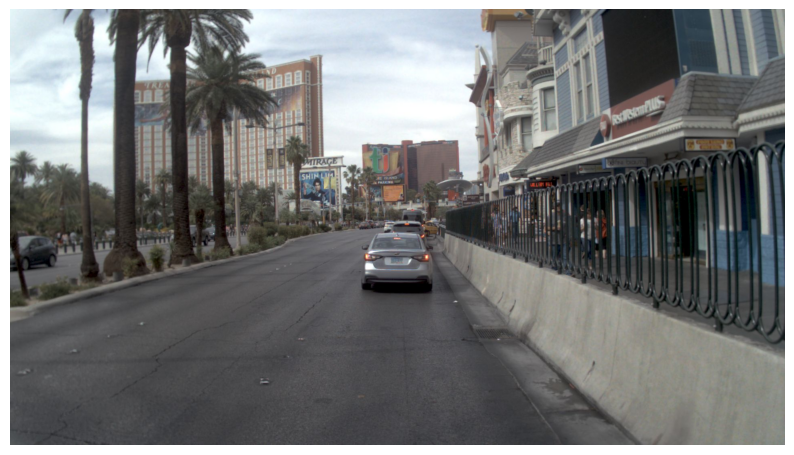

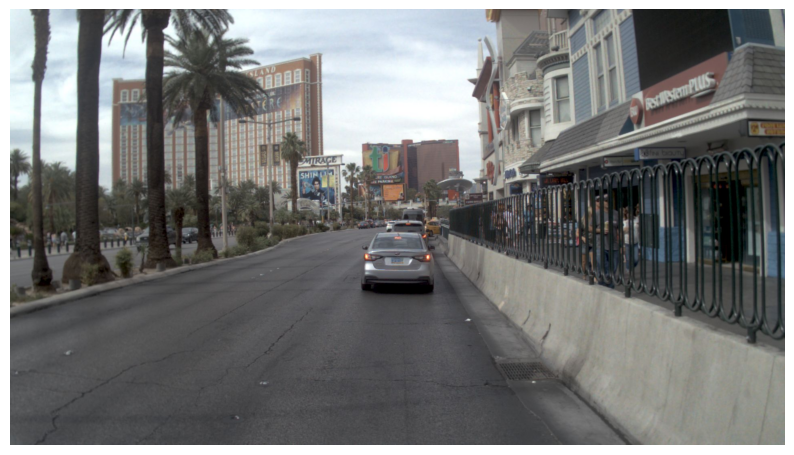

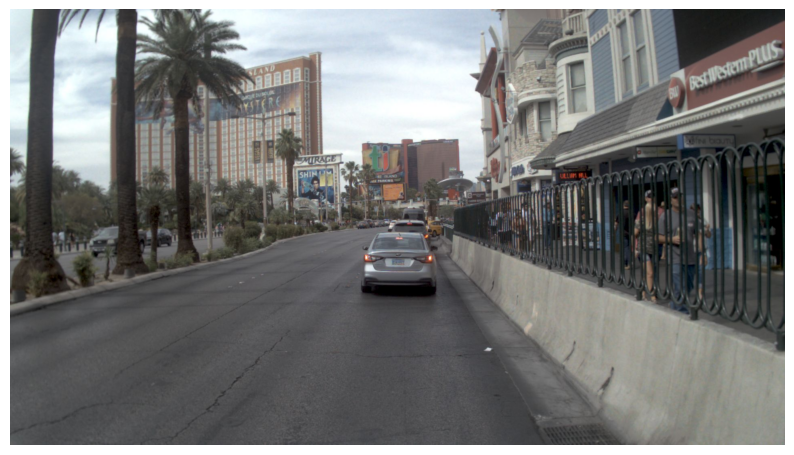

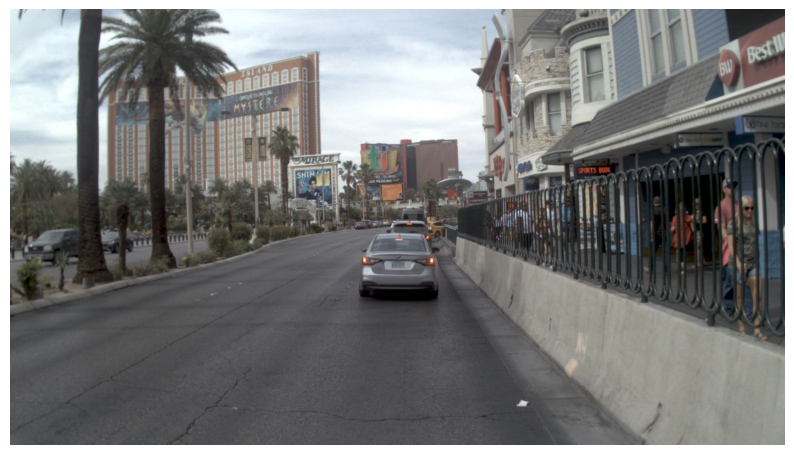

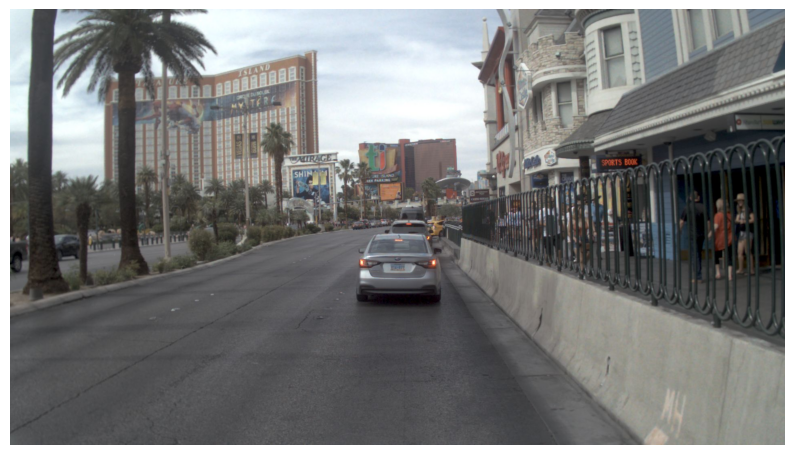

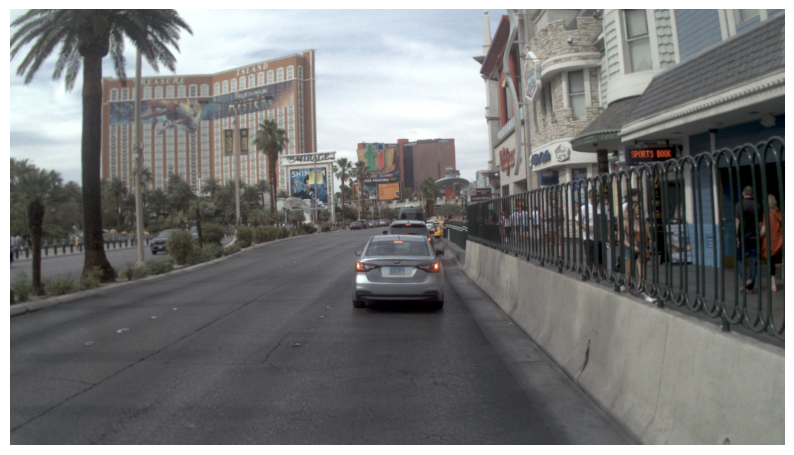

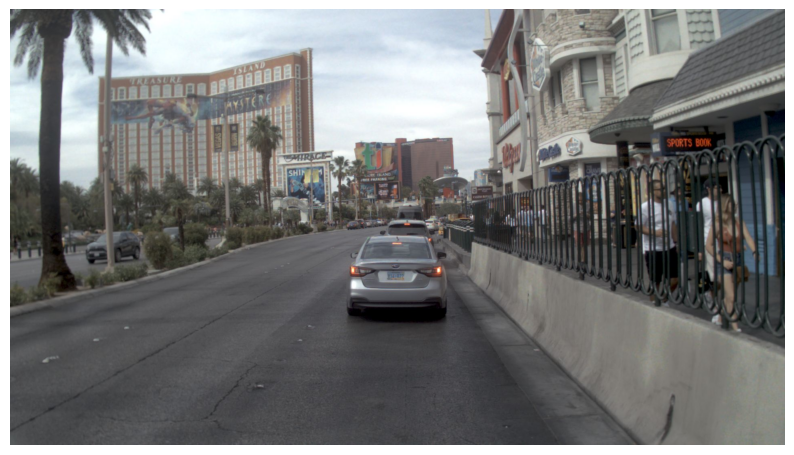

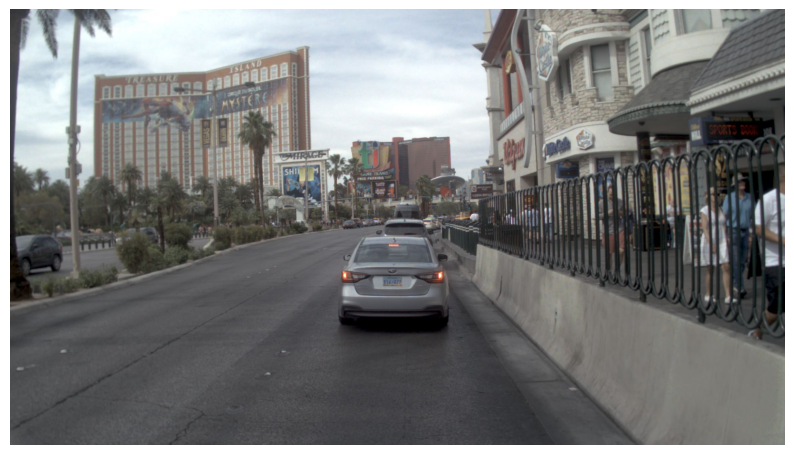

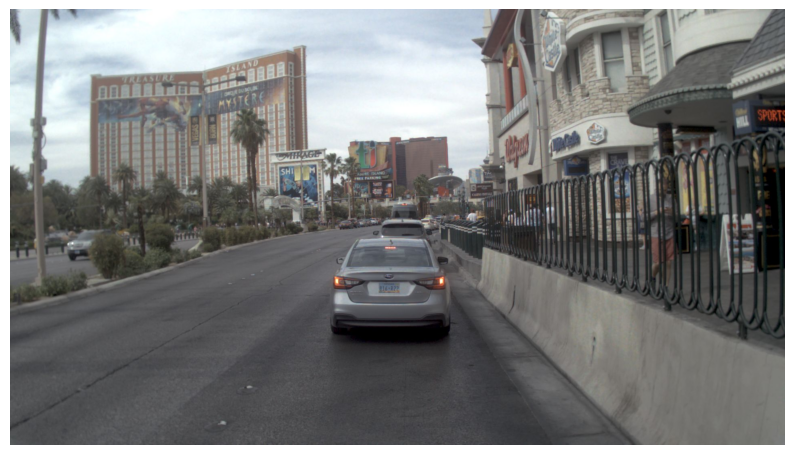

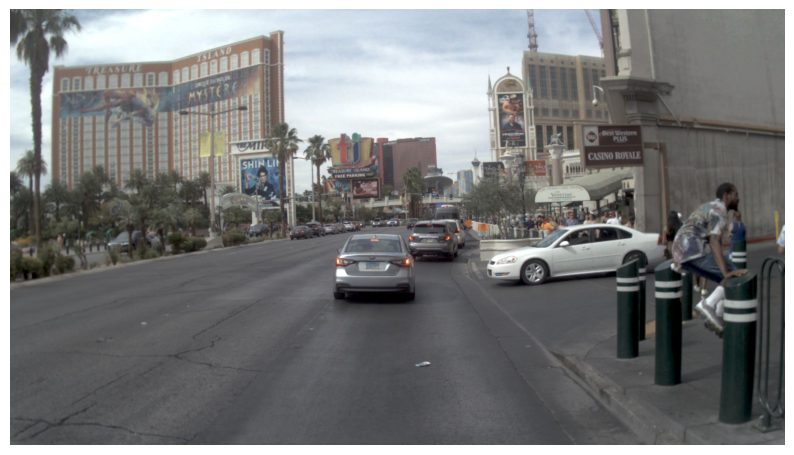

In [32]:
idx = random.randint(0, len(info_available) - 11)
plt.style.use("seaborn-v0_8-whitegrid")
for i in range(idx, idx + 10):
    img_path = os.path.join(img_dir, info_available[i]['cams'][cam_type.name]['data_path'])
    img = Image.open(img_path)
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis("off")